**Hruday Vishal Kanna Anand**

**1006874517**

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [ ]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

Iterations that were run: 9


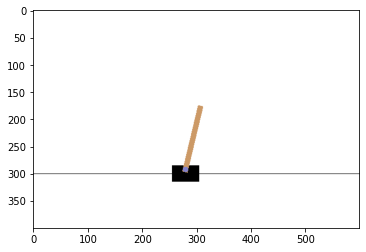

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(5000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  
  if done:
    break
    
ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)

In [ ]:
print(env.action_space)

Discrete(2)


In [ ]:
print(env.observation_space)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [ ]:
env.env.P

AttributeError: ignored

**Q.1** Can you design a dynamic programming based policy for the agent as in assignment 1? If so, design it and demonstrate that it solves the cart pole problem.

Dynamic programing cannot be used as we dont have an exact model of the probability fuction P(s',r|s,a). hence we would not be able to calculate the value function and must rely on stochastic sampling of the environment to calculate the Q function.

In [ ]:
  obs, reward, done, info = env.step(0)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [ ]:
actionSpace = [0,1]
numStates = 10 ** 4
numActions = env.action_space.n
GAMMA = 0.9
ALPHA = 0.01

In [ ]:
def createBins():
  bins = np.zeros((4, 10))
  bins[0] = np.linspace(-1.5, 1.5, 10)
  bins[1] = np.linspace(-2, 2, 10)
  bins[2] = np.linspace(-.5, .5, 10)
  bins[3] = np.linspace(-3, 3, 10)

  return bins

In [ ]:
def assignBins(obs, bins):
  state = np.zeros(4)
  for i in range(4):
    state[i] = np.digitize(obs[i], bins[i])
  return state

In [ ]:
def maxDict(d):
  max_v = float('-inf')
  for key, val in d.items():
    if val > max_v:
      max_v = val
      max_key = key
  return max_key, max_v

In [ ]:
def initQ():
  Q = {}

  for i in range(10):
    for j in range(10):
      for k in range(10):
        for l in range(10):

          Q[(i,j,k,l)] = {}
          for action in range(env.action_space.n):
            Q[(i,j,k,l)][action] = 0
  return Q

In [ ]:
def initTargetPolicy():
  pi = {}

  for i in range(10):
    for j in range(10):
      for k in range(10):
        for l in range(10):
          pi[(i,j,k,l)]= np.random.choice(actionSpace)
  return pi

In [ ]:
def initBehaviourPolicy(epsilon):
  b = {}

  for i in range(10):
    for j in range(10):
      for k in range(10):
        for l in range(10):
          if np.random.choice(actionSpace)==0:  
            b[(i,j,k,l)]= [1-epsilon,epsilon]
          else:
            b[(i,j,k,l)]= [epsilon,1-epsilon]
  return b

In [ ]:
def initC():
  C = {}

  for i in range(10):
    for j in range(10):
      for k in range(10):
        for l in range(10):
          C[(i,j,k,l)] = {}
          for action in range(env.action_space.n):
            C[(i,j,k,l)][action] = 0
  return C

In [ ]:
bins= createBins()

In [ ]:
state=assignBins(obs,bins)

In [ ]:
b=initBehaviourPolicy(0.1)


In [ ]:
np.random.choice(actionSpace, p=b[state])

0

In [ ]:
q= initQ()

In [ ]:
pi=initTargetPolicy()

In [ ]:
c= initC()

In [ ]:
def episode(env, policy,bins, display):
  obs = env.reset()
  rewards = []
  actions = []
  states = []
  totalRewards = 0
  while True:
      state = tuple(assignBins(obs, bins))
      action = np.random.choice(actionSpace, p=policy[state])
      actions.append(action)
      states.append(state)

      obs, reward, done, info = env.step(action)
      if display == True:
          screen = env.render(mode='rgb_array')
          plt.imshow(screen)
      totalRewards += reward
      rewards.append(reward)
      if done == True:
          if display == True:
              print(totalRewards)
          break
      #print(totalRewards)
  return states, actions, rewards

In [ ]:
obs=env.reset()
print(obs)
state = tuple(assignBins(obs, bins))
print(state)
print(pi[state])
action = np.random.choice(tuple(pi[state]))
print(action)

[0.02652397 0.00134107 0.04984708 0.02426137]
(5.0, 5.0, 5.0, 5.0)
0


TypeError: ignored

In [ ]:
np.random.choice(actionSpace, p=(0.1,0.9))

0

21.0


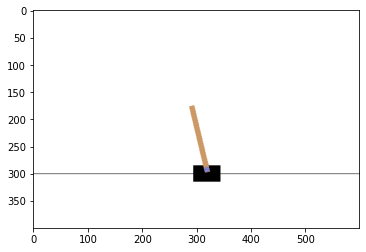

In [ ]:
states, actions, rewards= episode(env,b, bins, True)

Iterations that were run: 10


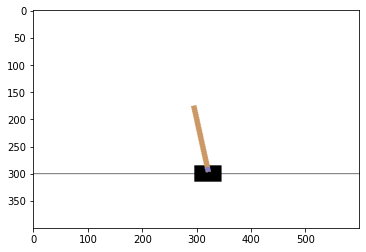

In [ ]:
env = gym.make("CartPole-v0")
env.reset()
state_list=[]
for i in range(5000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  if not state_list:
    state_list.append(((0,0,0,0),action, reward))
  else:
    state_list.append((prev_obs,action, reward))
  prev_obs=tuple(obs)
  screen = env.render(mode='rgb_array')
  
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break
    
ipythondisplay.clear_output(wait=True)
print("Iterations that were run:",i)



**Q.2** Can you design a Monte Carlo based policy for the agent? What ingredients do you require? Explain the design flow, and execute it. Show that it works, or indicate why you can't proceed.

Yes we can design a Monte Carlo based policy for the agent. For the monte carlo method we need to make a set of episodes and calculate the state action value function by averaging the returns for each state through all the episodes. we would need to design a policy to stocasticly sample the environment so that we can create the episodes.

in code above we ran one episode and made a state list consisting of the state the action taken  and the reward obtained for that action.

using this list and iterating backwards we can create the returns for every state.

this is done over many episodes to get multiple returns for the same states, which is then averaged to give us a viable Q- state action value function.



The problem that was faced is that we dont have an idea of the possible states that the cart can take hence it because hard to create a policy for the cart for states we dont know about.